The first part of this notebook will focus Neuron Engineer's work. (https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy) He made a great notebook on Kaggle about pre-processing on the retina images.

In [1]:
# import block
import numpy as np
import pandas as pd
import cv2
import random
import glob
import matplotlib.pyplot as plt

SEED=42

In [2]:
# train dataframe
train_data_df = pd.read_csv("D:\\Data_Science\\Datasets\\Aptos-Blindness-Challenge\\data\\train.csv")
train_data_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [3]:
# Take 5 images from each class
# I already modified the train data structure so that they are separated by class. 
random_files_list = []
class_list = [0,1,2,3,4]
data_path = "D:\\Data_Science\\Datasets\\Aptos-Blindness-Challenge\\data\\train\\separated\\train\\"
for cls in class_list:
    random_files_list.append(random.sample(glob.glob(data_path+str(cls)+"\\*"),5))
random_files_list = [j for i in random_files_list for j in i]

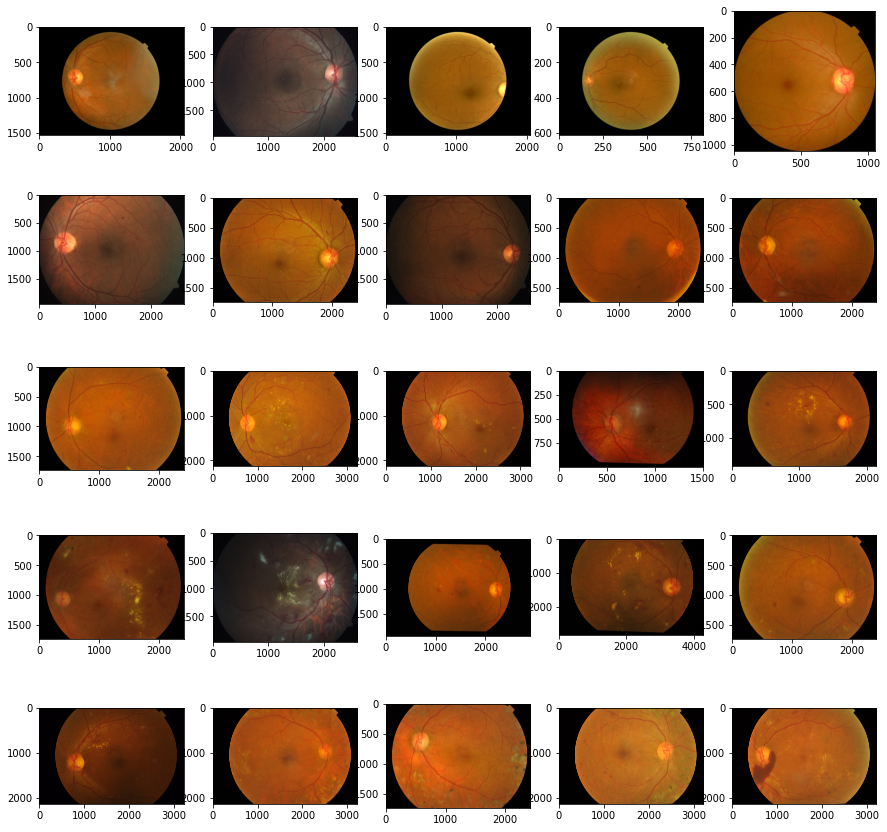

In [4]:
# Visualizing the random images
def visualize_grid(images, size_of_grid, size_of_image, is_gray):
    row, ind = 0, 0
    f, axarr = plt.subplots(size_of_grid,size_of_grid, 
                            figsize=(size_of_image,size_of_image))
    for image in images:
        if is_gray:
            axarr[row,ind].imshow(image, cmap='gray')
        else:
            axarr[row,ind].imshow(image)
        ind += 1
        if ind == 5:
            ind = 0
            row += 1
            
    plt.show()

images = [cv2.imread(img) for img in random_files_list]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
visualize_grid(images, 5, 15, False)

Now, one thing that we observe right away is the disparity in the brightness. Collectively there should a general level of brightness/whiteness over all the images.

We will try and implement Ben Graham's solution to the previous Diabetic Retinopathy competition. He added the Gaussian blurred version of the image to itself to accentuate subtle features.

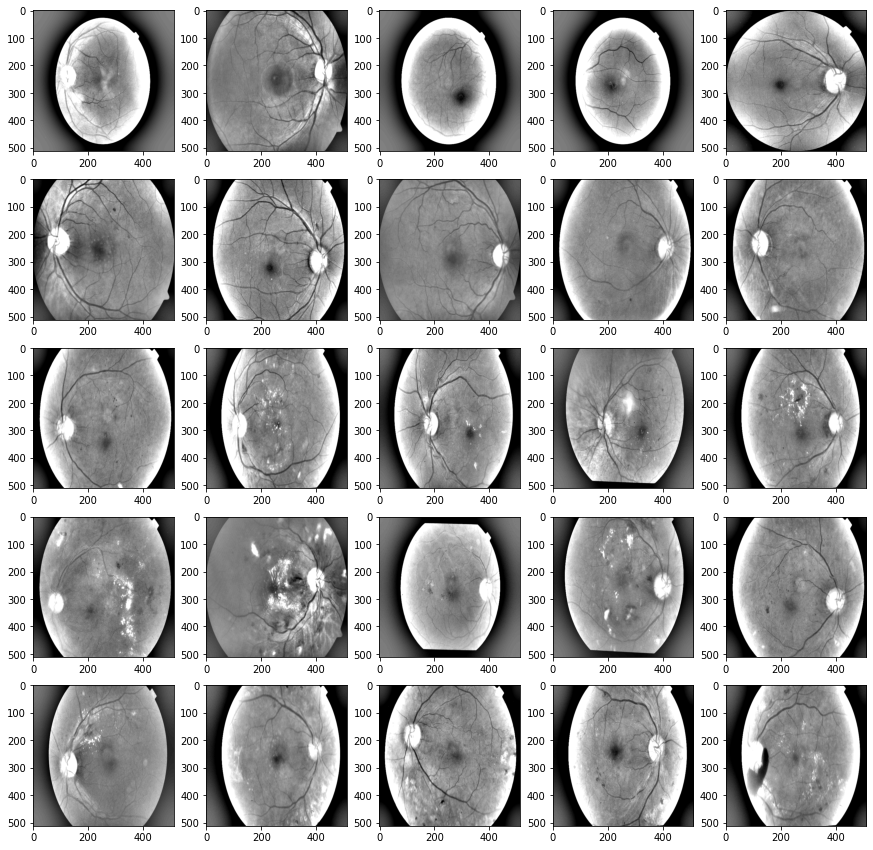

In [5]:
IMG_SIZE = 512

def ben_preprocessing(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.addWeighted (image, 4, cv2.GaussianBlur(image, (0, 0), IMG_SIZE/10), -4, 128)
    return image

images = [ben_preprocessing(img) for img in random_files_list]
visualize_grid(images, 5, 15, True)

What I want to do next is to do the same in color. Fortunately, Neuron Engineer already did that. 

In [ ]:
def circle_crop(img, sigmaX=10):   
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [ ]:
img =  random_files_list[0]
img = cv2.imread(img)